# Horse Racing prediction

In [1]:
# 설치 라이브러리 
# ! pip install optuna
# ! pip install lightgbm
# ! pip install --upgrade pandas

In [2]:
# 기본 라이브러리
import pandas as pd
import numpy as np

# 시각화 라이브러리 
import matplotlib.pyplot as plt
import seaborn as sns

# 모델 평가 라이브러리
from sklearn.metrics import accuracy_score

# 인코딩 라이브러리
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# 모델링 라이브러리
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold

# 회귀 라이브러리
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingRegressor
from lightgbm import LGBMRegressor
import xgboost 
from xgboost import XGBRegressor

# 모델 파라미터 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import joblib
import optuna

In [3]:
# 그래프 한글 표현
plt.rc('font', family='Malgun Gothic')

In [4]:
# 데이터 호출
horse_path = "full_df(regressor).csv"
data_DF = pd.read_csv(horse_path, encoding = "cp949")
data_DF = data_DF.drop(columns = "Unnamed: 0")

In [6]:
data_DF["거리"].value_counts()

12    3614
14    2262
13    1362
10    1008
18     941
17     869
20     184
16     109
23       8
Name: 거리, dtype: int64

## 모든 거리 경기

In [8]:
data_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10357 entries, 0 to 10356
Columns: 104 entries, 부마성적 to 모마성적13
dtypes: float64(85), int64(19)
memory usage: 8.2 MB


In [9]:
# 모든 거리의 데이터 탐색
data_DF["기록"].describe()

count    10357.000000
mean        86.687496
std         17.387451
min         59.200000
25%         75.400000
50%         82.400000
75%         89.700000
max        154.200000
Name: 기록, dtype: float64

In [10]:
# 거리 별로 데이터 나누기
space_10 = data_DF[data_DF["거리"] == 10]
space_12= data_DF[data_DF["거리"] == 12]
space_13= data_DF[data_DF["거리"] == 13]
space_14 = data_DF[data_DF["거리"] == 14]
space_15 = data_DF[data_DF["거리"] == 15]
space_16 = data_DF[data_DF["거리"] == 16]
space_17 = data_DF[data_DF["거리"] == 17]
space_18 = data_DF[data_DF["거리"] == 18]

## 1000m 경기

In [11]:
des = space_10["기록"].describe()
IQR = des.loc["75%"] - des.loc["25%"]
max_10 = des.loc["75%"] + (1,5 * IQR)
max_10[0]

64.6

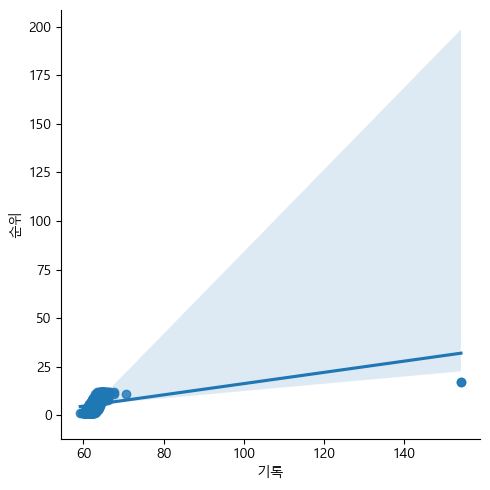

In [12]:
# 1000m 경기 분포
sns.lmplot(data=space_10, x = "기록", y = "순위")
plt.show()

In [13]:
# 실격 및 주행정지로 인한 drop
space_index = space_10[space_10["기록"] > max_10[0]+10].index
data_DF_10 = space_10.copy()
data_DF_10.drop(index = space_index, inplace=True)

In [14]:
data_DF_10.reset_index(drop=True, inplace=True)

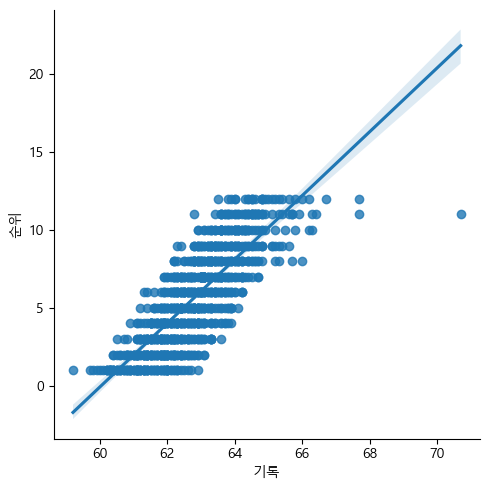

In [15]:
sns.lmplot(data=data_DF_10, x = "기록", y = "순위")
plt.show()

In [16]:
data_DF_10["기록"].describe()

count    1006.000000
mean       62.784294
std         1.245590
min        59.200000
25%        61.900000
50%        62.800000
75%        63.600000
max        70.700000
Name: 기록, dtype: float64

## 1200m 경기

In [17]:
# 1200m 거리의 사분위수 범위 계산
des = space_12["기록"].describe()
IQR = des.loc["75%"] - des.loc["25%"]
max_12 = des.loc["75%"] + (1,5 * IQR)
max_12[0]

77.9

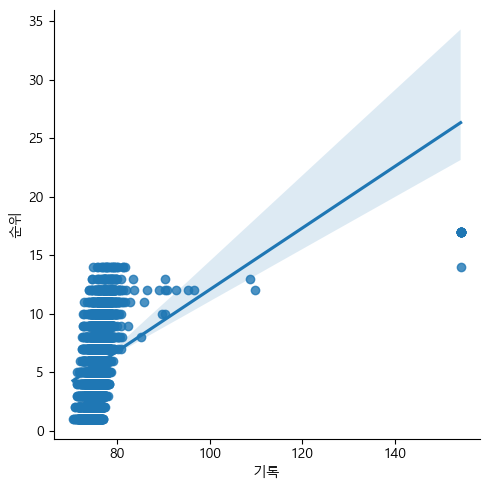

In [18]:
# 1200m 경기 분포
sns.lmplot(data=space_12, x = "기록", y = "순위")
plt.show()

In [19]:
# 실격 및 주행정지로 인한 drop
space_index = space_12[space_12["기록"] > max_12[0]+5].index
data_DF_12 = space_12.copy()
data_DF_12.drop(index = space_index, inplace=True)

In [20]:
data_DF_12.reset_index(drop=True, inplace=True)

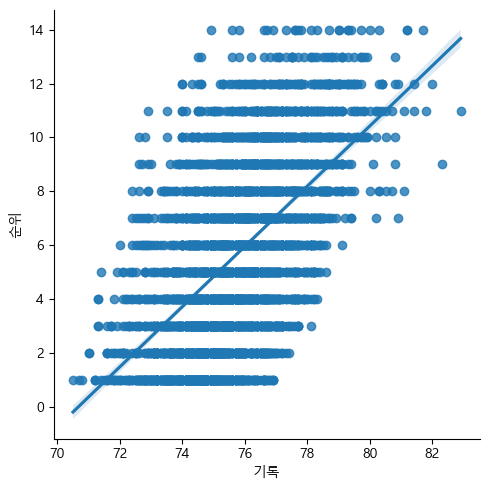

In [21]:
sns.lmplot(data=data_DF_12, x = "기록", y = "순위")
plt.show()

In [22]:
data_DF_12["기록"].describe()

count    3586.000000
mean       75.757501
std         1.695636
min        70.500000
25%        74.600000
50%        75.700000
75%        76.800000
max        82.900000
Name: 기록, dtype: float64

## 1300m 경기

In [23]:
# 1300m 거리의 사분위수 범위 계산
des = space_13["기록"].describe()
IQR = des.loc["75%"] - des.loc["25%"]
max_13 = des.loc["75%"] + (1,5 * IQR)
max_13[0]

84.7

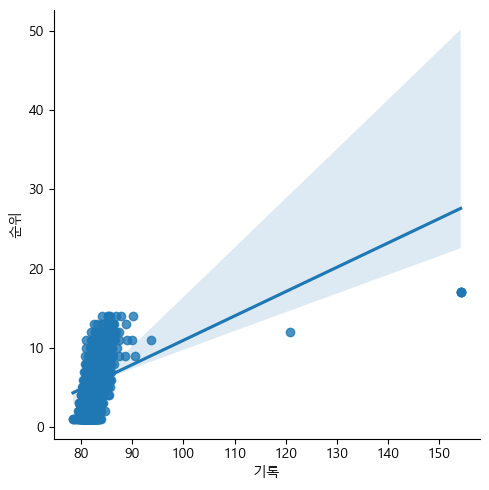

In [24]:
sns.lmplot(data=space_13, x = "기록", y = "순위")
plt.show()

In [25]:
# 실격 및 주행정지로 인한 drop
space_index = space_13[space_13["기록"] > max_13[0]+10].index
data_DF_13 = space_13.copy()
data_DF_13.drop(index = space_index, inplace=True, axis=1)

In [26]:
data_DF_13.reset_index(drop=True, inplace=True)

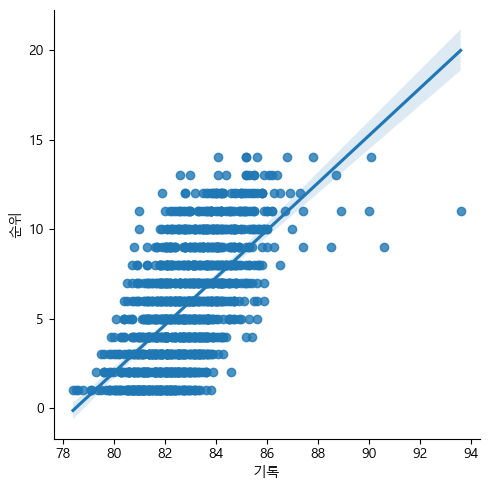

In [27]:
sns.lmplot(data=data_DF_13, x = "기록", y = "순위")
plt.show()

In [28]:
data_DF_13["기록"].describe()

count    1357.000000
mean       82.812970
std         1.532117
min        78.400000
25%        81.800000
50%        82.700000
75%        83.700000
max        93.600000
Name: 기록, dtype: float64

## 1400m 경기 

In [29]:
# 1400m 거리의 사분위수 범위 계산
des = space_14["기록"].describe()
IQR = des.loc["75%"] - des.loc["25%"]
max_14 = des.loc["75%"] + (1,5 * IQR)
max_14[0]

90.4

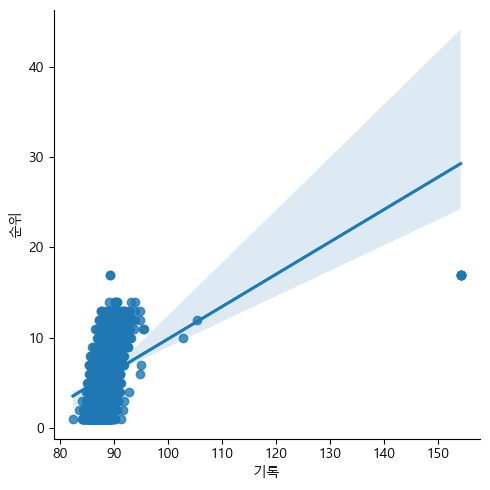

In [30]:
sns.lmplot(data=space_14, x = "기록", y = "순위")
plt.show()

In [31]:
# 실격 및 주행정지로 인한 drop
space_index = space_14[space_14["기록"] > max_14[0]+10].index
data_DF_14 = space_14.copy()
data_DF_14.drop(index = space_index, inplace=True, axis=1)

In [32]:
data_DF_14.reset_index(drop=True, inplace=True)

C:\Users\sjm24\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\sjm24\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


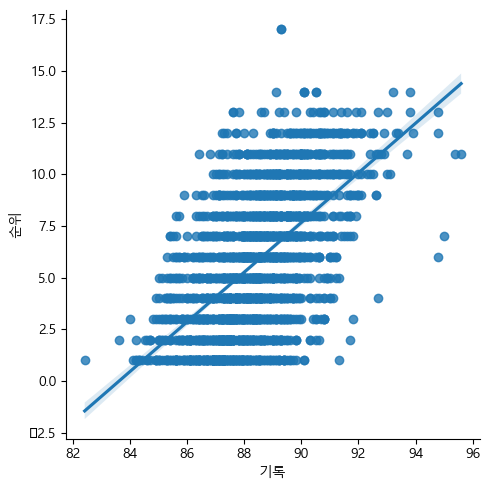

In [33]:
sns.lmplot(data=data_DF_14, x = "기록", y = "순위")
plt.show()

In [34]:
data_DF_14["기록"].describe()

count    2254.000000
mean       88.406122
std         1.600887
min        82.400000
25%        87.400000
50%        88.400000
75%        89.400000
max        95.600000
Name: 기록, dtype: float64

## 1500m

In [35]:
# 1500m 거리의 사분위수 범위 계산
des = space_15["기록"].describe()
IQR = des.loc["75%"] - des.loc["25%"]
max_15 = des.loc["75%"] + (1,5 * IQR)
max_15[0]

119.9

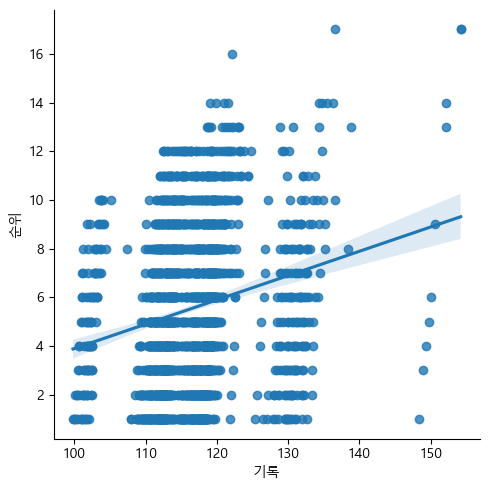

In [36]:
# 1500m 경기 분포
sns.lmplot(data=space_15, x = "기록", y = "순위")
plt.show()

In [37]:
# 실격 및 주행정지로 인한 drop
space_index = space_15[space_15["기록"] > 140].index
data_DF_long = space_15.copy()
data_DF_long.drop(index = space_index, inplace=True, axis=1)

In [38]:
data_DF_long.reset_index(drop=True, inplace=True)

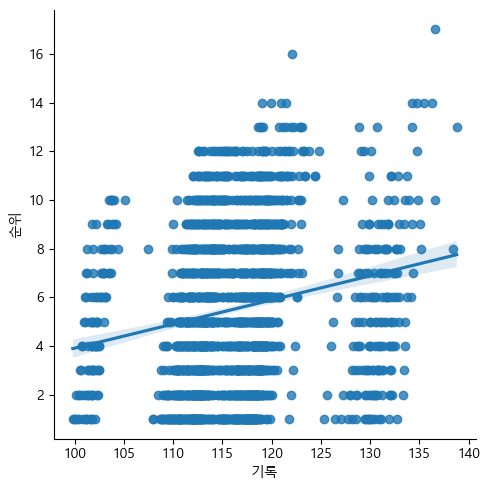

In [39]:
sns.lmplot(data=data_DF_long, x = "기록", y = "순위")
plt.show()

In [40]:
data_DF_long["기록"].describe()

count    2101.000000
mean      116.298144
std         6.318002
min        99.800000
25%       112.600000
50%       116.200000
75%       118.900000
max       138.800000
Name: 기록, dtype: float64

## 1600m

In [ ]:
# 1600m 거리의 사분위수 범위 계산
des = space_16["기록"].describe()
IQR = des.loc["75%"] - des.loc["25%"]
max_16 = des.loc["75%"] + (1,5 * IQR)
max_16[0]

In [ ]:
# 1600m 경기 분포
sns.lmplot(data=space_16, x = "기록", y = "순위")
plt.show()

In [ ]:
# 실격 및 주행정지로 인한 drop
space_index = space_16[space_16["기록"] > 140].index
data_DF_16 = space_16.copy()
data_DF_16.drop(index = space_index, inplace=True, axis=1)
data_DF_16.reset_index(drop=True, inplace=True)

In [ ]:
sns.lmplot(data=data_DF_16, x = "기록", y = "순위")
plt.show()

In [ ]:
data_DF_16["기록"].describe()

## 1700m

In [ ]:
# 1700m 거리의 사분위수 범위 계산
des = space_17["기록"].describe()
IQR = des.loc["75%"] - des.loc["25%"]
max_17 = des.loc["75%"] + (1,5 * IQR)
max_17[0]

In [ ]:
# 1700m 경기 분포
sns.lmplot(data=space_17, x = "기록", y = "순위")
plt.show()

In [ ]:
# 실격 및 주행정지로 인한 drop
space_index = space_17[space_17["기록"] > 140].index
data_DF_17 = space_17.copy()
data_DF_17.drop(index = space_index, inplace=True, axis=1)
data_DF_17.reset_index(drop=True, inplace=True)

In [ ]:
sns.lmplot(data=data_DF_17, x = "기록", y = "순위")
plt.show()

In [ ]:
data_DF_17["기록"].describe()

## 1800m

In [ ]:
des = space_18["기록"].describe()
IQR = des.loc["75%"] - des.loc["25%"]
max_18 = des.loc["75%"] + (1,5 * IQR)
max_18[0]

In [ ]:
sns.lmplot(data=space_18, x = "기록", y = "순위")
plt.show()

In [ ]:
# 실격 및 주행정지로 인한 drop
space_index = space_18[space_18["기록"] > 140].index
data_DF_18 = space_18.copy()
data_DF_18.drop(index = space_index, inplace=True, axis=1)
data_DF_18.reset_index(drop=True, inplace=True)

In [ ]:
sns.lmplot(data=data_DF_18, x = "기록", y = "순위")
plt.show()

In [ ]:
data_DF_18["기록"].describe()

## 순위 컬럼 삭제

In [41]:
data_DF.drop(columns = "순위", axis=1)

,부마성적,모마성적,조교사 점수,기수 점수,거리,군(등급),번호,주로상태,기록,부담중량,...,기수 점수12,부마성적12,모마성적12,부담중량13,마체중13,순위 점수13,조교사 점수13,기수 점수13,부마성적13,모마성적13
0,20.166667,0.333333,0.260867,0.375748,14,1,3,0,84.3,54.5,...,0.125041,19.064066,12.289275,52.863636,6.202555,0,0.343872,0.125041,19.064066,12.289275
1,24.312500,18.047619,0.562395,0.013551,14,1,4,0,84.7,51.0,...,0.125041,19.064066,12.289275,52.863636,6.202555,0,0.343872,0.125041,19.064066,12.289275
2,29.184211,10.226855,0.000000,0.135597,14,1,5,0,85.2,52.0,...,0.125041,19.064066,12.289275,52.863636,6.202555,0,0.343872,0.125041,19.064066,12.289275
3,18.222222,11.111111,0.254518,0.052286,14,1,10,0,85.3,52.0,...,0.125041,19.064066,12.289275,52.863636,6.202555,0,0.343872,0.125041,19.064066,12.289275
4,11.000000,10.226855,0.817388,0.185337,14,1,1,0,85.6,52.0,...,0.125041,19.064066,12.289275,52.863636,6.202555,0,0.343872,0.125041,19.064066,12.289275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10352,6.600000,4.111111,0.491655,0.135222,10,4,5,0,61.5,55.0,...,0.146082,20.208780,6.481897,55.000000,6.206102,0,0.319189,0.146082,20.208780,6.481897
10353,29.000000,2.000000,0.469562,0.135597,10,4,3,0,62.4,55.0,...,0.146082,20.208780,6.481897,55.000000,6.206102,0,0.319189,0.146082,20.208780,6.481897
10354,20.181818,0.250000,0.228434,0.132307,10,4,10,0,62.8,55.0,...,0.146082,20.208780,6.481897,55.000000,6.206102,0,0.319189,0.146082,20.208780,6.481897
10355,27.166667,9.111111,0.086481,0.070814,10,4,11,0,62.9,55.0,...,0.146082,20.208780,6.481897,55.000000,6.206102,0,0.319189,0.146082,20.208780,6.481897


# Origin Machine Learning Modeling

In [42]:
# 종속변수 / 독리변수 분해
y_horse = data_DF["기록"]
x_horse = data_DF.drop(columns ="기록")

In [43]:
# 학습 데이터, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(x_horse, y_horse, random_state = 10, test_size=0.2)

In [44]:
# train / test 확인 
print("train data", len(X_train))
print("test data", len(X_test))
print("train label", len(y_train))
print("test label", len(y_test))

train data 8285
test data 2072
train label 8285
test label 2072


In [45]:
# Kfold
kfold = KFold(n_splits = 5, random_state = 10, shuffle=True)

## Cross Validation Models

In [46]:
# cross_val_score 함수화 
def regressor_cv(model):
    r2_score = cross_val_score(model, X_train, y_train, cv = kfold, scoring = "r2")
    return r2_score

In [47]:
# RandomForestRegressor 
rf = RandomForestRegressor(n_jobs=-1, random_state = 10)
sk_rf = regressor_cv(rf)
for idx, score in enumerate(sk_rf):
    print(f"RF의 {idx}번 분석 결과 : {score:4f}")
print(sk_rf.mean())

RF의 0번 분석 결과 : 0.990993
RF의 1번 분석 결과 : 0.992749
RF의 2번 분석 결과 : 0.979809
RF의 3번 분석 결과 : 0.979807
RF의 4번 분석 결과 : 0.989369
0.9865452052162414


In [48]:
# LGBMRegressor
gbm = LGBMRegressor(n_jobs=-1, random_state = 10)
sk_gbm = regressor_cv(gbm)
for idx, score in enumerate(sk_gbm):
    print(f"LGB의 {idx}번 분석 결과 : {score:4f}")
print(sk_gbm.mean())

LGB의 0번 분석 결과 : 0.984923
LGB의 1번 분석 결과 : 0.962701
LGB의 2번 분석 결과 : 0.969095
LGB의 3번 분석 결과 : 0.961700
LGB의 4번 분석 결과 : 0.956241
0.9669320320850225


In [49]:
# XGBRegressor
xgb = XGBRegressor(n_jobs=-1, random_state = 10)
sk_xgb = regressor_cv(xgb)
for idx, score in enumerate(sk_xgb):
    print(f"XGB의 {idx}번 분석 결과 : {score:4f}")
print(sk_xgb.mean())

XGB의 0번 분석 결과 : 0.992229
XGB의 1번 분석 결과 : 0.989989
XGB의 2번 분석 결과 : 0.971547
XGB의 3번 분석 결과 : 0.985597
XGB의 4번 분석 결과 : 0.985449
0.9849620544418803


## Parameter check

### RandomForestRegressor

In [50]:
def rf_objective (trial):
    params = {
        "n_estimators" : trial.suggest_int("n_estimators", 100, 3000),
        "max_depth" : trial.suggest_int("max_depth", 1, 100),
        "min_samples_leaf" : trial.suggest_int("min_samples_leaf", 2, 500),
        "max_features" : trial.suggest_int("max_features",1, X_train.shape[1])
    }
    RFC = RandomForestRegressor(n_jobs=-1, random_state=10, **params)
    scores =  regressor_cv(RFC)
    scores_mean = scores.mean()
    return scores_mean

In [51]:
rf_study = optuna.create_study(direction = "maximize")
rf_study.optimize(rf_objective, n_trials = 10)

[I 2022-11-17 20:51:55,452] A new study created in memory with name: no-name-caab5399-2a19-455e-819c-7685a7ff6610
[I 2022-11-17 20:52:30,084] Trial 0 finished with value: 0.9379761955398136 and parameters: {'n_estimators': 335, 'max_depth': 88, 'min_samples_leaf': 219, 'max_features': 81}. Best is trial 0 with value: 0.9379761955398136.
[I 2022-11-17 20:54:13,687] Trial 1 finished with value: 0.91796137412496 and parameters: {'n_estimators': 1393, 'max_depth': 70, 'min_samples_leaf': 243, 'max_features': 56}. Best is trial 0 with value: 0.9379761955398136.
[I 2022-11-17 20:54:40,221] Trial 2 finished with value: 0.5747270264911839 and parameters: {'n_estimators': 1579, 'max_depth': 31, 'min_samples_leaf': 167, 'max_features': 7}. Best is trial 0 with value: 0.9379761955398136.
[I 2022-11-17 20:54:51,388] Trial 3 finished with value: 0.4027201976939714 and parameters: {'n_estimators': 887, 'max_depth': 73, 'min_samples_leaf': 496, 'max_features': 7}. Best is trial 0 with value: 0.937976

In [52]:
# 최적의 파라미터 추출
print(rf_study.best_trial.params)
# rf_study_best_estimator_ =  {'n_estimators': 856, 'max_depth': 17, 'min_samples_leaf': 65, 'max_features': 89}

{'n_estimators': 1403, 'max_depth': 79, 'min_samples_leaf': 34, 'max_features': 72}


In [53]:
rf_study_best = RandomForestRegressor(n_jobs=-1, 
                                      random_state=10, 
                                      n_estimators = rf_study.best_trial.params["n_estimators"],
                                      max_depth = rf_study.best_trial.params["max_depth"],
                                      min_samples_leaf = rf_study.best_trial.params["min_samples_leaf"], 
                                      max_features = rf_study.best_trial.params["max_features"], 
                                      )
rf_study_best.fit(X_train, y_train)
rf_study_ypred = rf_study_best.predict(X_test)
print("RandomForestRegressor R2 :", r2_score(rf_study_ypred, y_test))
rf_study_ypred

RandomForestRegressor R2 : 0.9330577858553949


array([ 78.58711565,  89.38044223, 117.34265581, ..., 113.89780647,
        81.22137669,  85.11350132])

## 1000m train_test_split

In [66]:
# 1000 학습 데이터, 테스트 데이터 분리
y_horse_10 = data_DF_10["기록"]
x_horse_10 = data_DF_10.drop(columns ="기록")
# 학습 데이터, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(x_horse_10, y_horse_10, random_state = 10, test_size=0.2)
# train / test 확인 
print("train data", len(X_train))
print("test data", len(X_test))
print("train label", len(y_train))
print("test label", len(y_test))
# Kfold
kfold = KFold(n_splits = 5, random_state = 10, shuffle=True)
# StratifiedKFold
S_kfold = StratifiedKFold(n_splits = 5, random_state = 10, shuffle=True)

train data 804
test data 202
train label 804
test label 202


In [ ]:
def rf_10_objective (trial):
    params = {
        "n_estimators" : trial.suggest_int("n_estimators", 100, 2000),
        "max_depth" : trial.suggest_int("max_depth", 1, 100),
        "min_samples_leaf" : trial.suggest_int("min_samples_leaf", 2, 100),
        "max_features" : trial.suggest_int("max_features",1, X_train.shape[1])
    }
    RFC = RandomForestRegressor(n_jobs=-1, random_state=10, **params)
    RFC.fit(X_train, y_train)
    scores =  regressor_cv(RFC)
    scores_mean = scores.mean()
    return scores_mean

rf_10_study = optuna.create_study(direction = "maximize")
rf_10_study.optimize(rf_10_objective, n_trials = 50)

rf_10_study_best = RandomForestRegressor (n_jobs=-1, 
                                      random_state=10, 
                                      n_estimators =rf_10_study.best_trial.params["n_estimators"], 
                                      max_depth = rf_10_study.best_trial.params["max_depth"],
                                      min_samples_leaf = rf_10_study.best_trial.params["min_samples_leaf"], 
                                      max_features = rf_10_study.best_trial.params["max_features"])
rf_10_study_best.fit(X_train, y_train)
rf_10_study_ypred = rf_10_study_best.predict(X_test)
print("RandomForestRegressor R2 :", r2_score(rf_10_study_ypred, y_test))

[I 2022-11-17 21:22:19,282] A new study created in memory with name: no-name-f3b582c6-ece0-44ae-9563-50812af38cf8
[I 2022-11-17 21:22:37,194] Trial 0 finished with value: -0.0028762489200594653 and parameters: {'n_estimators': 2719, 'max_depth': 37, 'min_samples_leaf': 464, 'max_features': 43}. Best is trial 0 with value: -0.0028762489200594653.
[I 2022-11-17 21:22:49,066] Trial 1 finished with value: 0.1104000731037709 and parameters: {'n_estimators': 2348, 'max_depth': 80, 'min_samples_leaf': 150, 'max_features': 10}. Best is trial 1 with value: 0.1104000731037709.
[I 2022-11-17 21:23:02,553] Trial 2 finished with value: -0.002875424999675591 and parameters: {'n_estimators': 2857, 'max_depth': 71, 'min_samples_leaf': 480, 'max_features': 26}. Best is trial 1 with value: 0.1104000731037709.
[I 2022-11-17 21:23:11,615] Trial 3 finished with value: 0.3571338473764489 and parameters: {'n_estimators': 1502, 'max_depth': 52, 'min_samples_leaf': 98, 'max_features': 31}. Best is trial 3 with

In [ ]:
pd.DataFrame(rf_10_study_ypred).describe()

In [ ]:
pd.DataFrame(y_test).describe()

In [ ]:
joblib.dump(rf_10_study_best, "rf_10_study_best.pkl")

## 1200m train_test_split

In [ ]:
# 1200m 학습 데이터, 테스트 데이터 분리
y_horse_12 = data_DF_12["기록"]
x_horse_12 = data_DF_12.drop(columns ="기록")
# 학습 데이터, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(x_horse_12, y_horse_12, random_state = 10, test_size=0.2)
# train / test 확인 
print("train data", len(X_train))
print("test data", len(X_test))
print("train label", len(y_train))
print("test label", len(y_test))
# Kfold
kfold = KFold(n_splits = 5, random_state = 10, shuffle=True)
# StratifiedKFold
S_kfold = StratifiedKFold(n_splits = 5, random_state = 10, shuffle=True)

In [ ]:
def rf_12_objective (trial):
    params = {
        "n_estimators" : trial.suggest_int("n_estimators", 100, 2000),
        "max_depth" : trial.suggest_int("max_depth", 1, 100),
        "min_samples_leaf" : trial.suggest_int("min_samples_leaf", 2, 100),
        "max_features" : trial.suggest_int("max_features",1, X_train.shape[1])
    }
    RFC = RandomForestRegressor(n_jobs=-1, random_state=10, **params)
    RFC.fit(X_train, y_train)
    scores =  regressor_cv(RFC)
    scores_mean = scores.mean()
    return scores_mean

rf_12_study = optuna.create_study(direction = "maximize")
rf_12_study.optimize(rf_12_objective, n_trials = 50)

rf_12_study_best = RandomForestRegressor (n_jobs=-1, 
                                      random_state=10, 
                                      n_estimators =rf_12_study.best_trial.params["n_estimators"], 
                                      max_depth = rf_12_study.best_trial.params["max_depth"],
                                      min_samples_leaf = rf_12_study.best_trial.params["min_samples_leaf"], 
                                      max_features = rf_12_study.best_trial.params["max_features"])
rf_12_study_best.fit(X_train, y_train)
rf_12_study_ypred = rf_12_study_best.predict(X_test)
print("RandomForestRegressor R2 :", r2_score(rf_12_study_ypred, y_test))

In [ ]:
pd.DataFrame(rf_12_study_ypred).describe()

In [ ]:
pd.DataFrame(y_test).describe()

In [ ]:
joblib.dump(rf_12_study_best, "rf_12_study_best.pkl")

## 1300m train_test_split

In [ ]:
# 1300m 학습 데이터, 테스트 데이터 분리
y_horse_13 = data_DF_13["기록"]
x_horse_13 = data_DF_13.drop(columns ="기록")
# 학습 데이터, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(x_horse_13, y_horse_13, random_state = 10, test_size=0.2)
# train / test 확인 
print("train data", len(X_train))
print("test data", len(X_test))
print("train label", len(y_train))
print("test label", len(y_test))
# Kfold
kfold = KFold(n_splits = 5, random_state = 10, shuffle=True)
# StratifiedKFold
S_kfold = StratifiedKFold(n_splits = 5, random_state = 10, shuffle=True)

In [ ]:
def rf_13_objective (trial):
    params = {
        "n_estimators" : trial.suggest_int("n_estimators", 100, 2000),
        "max_depth" : trial.suggest_int("max_depth", 1, 100),
        "min_samples_leaf" : trial.suggest_int("min_samples_leaf", 2, 100),
        "max_features" : trial.suggest_int("max_features",1, X_train.shape[1])
    }
    RFC = RandomForestRegressor(n_jobs=-1, random_state=10, **params)
    RFC.fit(X_train, y_train)
    scores =  regressor_cv(RFC)
    scores_mean = scores.mean()
    return scores_mean

rf_13_study = optuna.create_study(direction = "maximize")
rf_13_study.optimize(rf_13_objective, n_trials = 50)

rf_13_study_best = RandomForestRegressor (n_jobs=-1, 
                                      random_state=10, 
                                      n_estimators = rf_13_study.best_trial.params["n_estimators"], 
                                      max_depth = rf_13_study.best_trial.params["max_depth"],
                                      min_samples_leaf = rf_13_study.best_trial.params["min_samples_leaf"], 
                                      max_features = rf_13_study.best_trial.params["max_features"])
rf_13_study_best.fit(X_train, y_train)
rf_13_study_ypred = rf_13_study_best.predict(X_test)
print("RandomForestRegressor R2 :", r2_score(rf_13_study_ypred, y_test))

In [ ]:
pd.DataFrame(rf_13_study_ypred).describe()

In [ ]:
pd.DataFrame(y_test).describe()

In [ ]:
joblib.dump(rf_13_study_best, "rf_13_study_best.pkl")

## 1400m train_test_split

In [ ]:
# 1400m 학습 데이터, 테스트 데이터 분리
y_horse_14 = data_DF_14["기록"]
x_horse_14 = data_DF_14.drop(columns ="기록")
# 학습 데이터, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(x_horse_14, y_horse_14, random_state = 10, test_size=0.2)
# train / test 확인 
print("train data", len(X_train))
print("test data", len(X_test))
print("train label", len(y_train))
print("test label", len(y_test))
# Kfold
kfold = KFold(n_splits = 5, random_state = 10, shuffle=True)
# StratifiedKFold
S_kfold = StratifiedKFold(n_splits = 5, random_state = 10, shuffle=True)

In [ ]:
def rf_14_objective (trial):
    params = {
        "n_estimators" : trial.suggest_int("n_estimators", 100, 2000),
        "max_depth" : trial.suggest_int("max_depth", 1, 100),
        "min_samples_leaf" : trial.suggest_int("min_samples_leaf", 2, 100),
        "max_features" : trial.suggest_int("max_features",1, X_train.shape[1])
    }
    RFC = RandomForestRegressor(n_jobs=-1, random_state=10, **params)
    RFC.fit(X_train, y_train)
    scores =  regressor_cv(RFC)
    scores_mean = scores.mean()
    return scores_mean

rf_14_study = optuna.create_study(direction = "maximize")
rf_14_study.optimize(rf_14_objective, n_trials = 50)

rf_14_study_best = RandomForestRegressor (n_jobs=-1, 
                                          random_state=10, 
                                          n_estimators = rf_14_study.best_trial.params["n_estimators"], 
                                          max_depth = rf_14_study.best_trial.params["max_depth"],
                                          min_samples_leaf = rf_14_study.best_trial.params["min_samples_leaf"], 
                                          max_features = rf_14_study.best_trial.params["max_features"])
rf_14_study_best.fit(X_train, y_train)
rf_14_study_ypred = rf_14_study_best.predict(X_test)
print("RandomForestRegressor R2 :", r2_score(rf_14_study_ypred, y_test))

In [ ]:
pd.DataFrame(rf_14_study_ypred).describe()

In [ ]:
pd.DataFrame(y_test).describe()

In [ ]:
joblib.dump(rf_14_study_best, "rf_14_study_best.pkl")

## 1600m train_test_split

In [ ]:
# 1600m 학습 데이터, 테스트 데이터 분리
y_horse_16 = data_DF_16["기록"]
x_horse_16 = data_DF_16.drop(columns ="기록")
# 학습 데이터, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(x_horse_16, y_horse_16, random_state = 10, test_size=0.2)
# train / test 확인 
print("train data", len(X_train))
print("test data", len(X_test))
print("train label", len(y_train))
print("test label", len(y_test))
# Kfold
kfold = KFold(n_splits = 5, random_state = 10, shuffle=True)

In [ ]:
def rf_16_objective (trial):
    params = {
        "n_estimators" : trial.suggest_int("n_estimators", 100, 3000),
        "max_depth" : trial.suggest_int("max_depth", 1, 100),
        "min_samples_leaf" : trial.suggest_int("min_samples_leaf", 2, 500),
        "max_features" : trial.suggest_int("max_features",1, X_train.shape[1])
    }
    RFC = RandomForestRegressor(n_jobs=-1, random_state=10, **params)
    RFC.fit(X_train, y_train)
    scores =  regressor_cv(RFC)
    scores_mean = scores.mean()
    return scores_mean

rf_16_study = optuna.create_study(direction = "maximize")
rf_16_study.optimize(rf_16_objective, n_trials = 50)

rf_16_study_best = RandomForestRegressor (n_jobs=-1, 
                                          random_state=10, 
                                          n_estimators = rf_16_study.best_trial.params["n_estimators"], 
                                          max_depth = rf_16_study.best_trial.params["max_depth"],
                                          min_samples_leaf = rf_16_study.best_trial.params["min_samples_leaf"], 
                                          max_features = rf_16_study.best_trial.params["max_features"])
rf_16_study_best.fit(X_train, y_train)
rf_16_study_ypred = rf_16_study_best.predict(X_test)
print("RandomForestRegressor R2 :", r2_score(rf_16_study_ypred, y_test))

In [ ]:
pd.DataFrame(rf_16_study_ypred).describe()

In [ ]:
pd.DataFrame(y_test).describe()

In [ ]:
joblib.dump(rf_16_study_best, "rf_16_study_best.pkl")

## 1700m train_test_split

In [ ]:
# 1700m 학습 데이터, 테스트 데이터 분리
y_horse_17 = data_DF_17["기록"]
x_horse_17 = data_DF_17.drop(columns ="기록")
# 학습 데이터, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(x_horse_17, y_horse_17, random_state = 10, test_size=0.2)
# train / test 확인 
print("train data", len(X_train))
print("test data", len(X_test))
print("train label", len(y_train))
print("test label", len(y_test))
# Kfold
kfold = KFold(n_splits = 5, random_state = 10, shuffle=True)

In [ ]:
def rf_17_objective (trial):
    params = {
        "n_estimators" : trial.suggest_int("n_estimators", 100, 3000),
        "max_depth" : trial.suggest_int("max_depth", 1, 100),
        "min_samples_leaf" : trial.suggest_int("min_samples_leaf", 2, 500),
        "max_features" : trial.suggest_int("max_features",1, X_train.shape[1])
    }
    RFC = RandomForestRegressor(n_jobs=-1, random_state=10, **params)
    RFC.fit(X_train, y_train)
    scores =  regressor_cv(RFC)
    scores_mean = scores.mean()
    return scores_mean

rf_17_study = optuna.create_study(direction = "maximize")
rf_17_study.optimize(rf_17_objective, n_trials = 50)

rf_17_study_best = RandomForestRegressor (n_jobs=-1, 
                                          random_state=10, 
                                          n_estimators = rf_17_study.best_trial.params["n_estimators"], 
                                          max_depth = rf_17_study.best_trial.params["max_depth"],
                                          min_samples_leaf = rf_17_study.best_trial.params["min_samples_leaf"], 
                                          max_features = rf_17_study.best_trial.params["max_features"])
rf_17_study_best.fit(X_train, y_train)
rf_17_study_ypred = rf_17_study_best.predict(X_test)
print("RandomForestRegressor R2 :", r2_score(rf_17_study_ypred, y_test))

In [ ]:
pd.DataFrame(rf_17_study_ypred).describe()

In [ ]:
pd.DataFrame(y_test).describe()

In [ ]:
joblib.dump(rf_17_study_best, "rf_17_study_best.pkl")

## 1800m train_test_split


In [ ]:
# 1800m 학습 데이터, 테스트 데이터 분리
y_horse_18 = data_DF_18["기록"]
x_horse_18 = data_DF_18.drop(columns ="기록")
# 학습 데이터, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(x_horse_18, y_horse_18, random_state = 10, test_size=0.2)
# train / test 확인 
print("train data", len(X_train))
print("test data", len(X_test))
print("train label", len(y_train))
print("test label", len(y_test))
# Kfold
kfold = KFold(n_splits = 5, random_state = 10, shuffle=True)

In [ ]:
def rf_18_objective (trial):
    params = {
        "n_estimators" : trial.suggest_int("n_estimators", 100, 3000),
        "max_depth" : trial.suggest_int("max_depth", 1, 100),
        "min_samples_leaf" : trial.suggest_int("min_samples_leaf", 2, 500),
        "max_features" : trial.suggest_int("max_features",1, X_train.shape[1])
    }
    RFC = RandomForestRegressor(n_jobs=-1, random_state=10, **params)
    RFC.fit(X_train, y_train)
    scores =  regressor_cv(RFC)
    scores_mean = scores.mean()
    return scores_mean

rf_18_study = optuna.create_study(direction = "maximize")
rf_18_study.optimize(rf_18_objective, n_trials = 50)

rf_18_study_best = RandomForestRegressor (n_jobs=-1, 
                                          random_state=10, 
                                          n_estimators = rf_18_study.best_trial.params["n_estimators"], 
                                          max_depth = rf_18_study.best_trial.params["max_depth"],
                                          min_samples_leaf = rf_18_study.best_trial.params["min_samples_leaf"], 
                                          max_features = rf_18_study.best_trial.params["max_features"])
rf_18_study_best.fit(X_train, y_train)
rf_18_study_ypred = rf_18_study_best.predict(X_test)
print("RandomForestRegressor R2 :", r2_score(rf_18_study_ypred, y_test))

In [ ]:
pd.DataFrame(rf_18_study_ypred).describe()

In [ ]:
pd.DataFrame(y_test).describe()

In [ ]:
joblib.dump(rf_18_study_best, "rf_18_study_best.pkl")